In [5]:
import pandas as pd
import numpy as np
from datetime import time, datetime
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# Define path for Train, Test CSV and Sparse matrix files

trainSparseMatrixPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/train_sparse.npz"
testSparseMatrixPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/test_sparse.npz"
movieTitlesPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/movie_titles.csv"
movieMovieSimilarityPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/movie_movie_similarity_sparse.npz"

In [7]:
trainSparse = sparse.load_npz(trainSparseMatrixPath)

In [8]:
# Helper method for computing user user similarity
def computeUserSimilarity(sparseMatrix, userId = None, topNSimilarity=100):

  numberOfUsers = sparseMatrix.shape[0]

  # Get Row and Column Indices from the Sparse matrix
  nonZeroRowIndices, nonZeroColumnIndices = sparseMatrix.nonzero()

  # If no user is passed then take a random user
  if not userId:
    userId = nonZeroRowIndices[0]

  print("Computing Cosine Similarity for a User with index:", userId)

  # Start time
  startTime = datetime.now()

  # get the similarity row for userId with all other users
  similarity = cosine_similarity(sparseMatrix.getrow(userId), sparseMatrix).ravel()
  indices = similarity.argsort()[-topNSimilarity:]
  similarity = similarity[indices]

  print('Time taken :: ', datetime.now() - startTime)

  return similarity

In [9]:
userUserSimilarity = computeUserSimilarity(trainSparse)
print("Cosine Similarity:", userUserSimilarity)

Computing Cosine Similarity for a User with index: 6
Time taken ::  0:00:03.199973
Cosine Similarity: [0.44018606 0.4402478  0.44042971 0.44043915 0.44051224 0.44057498
 0.44063334 0.44070648 0.44075297 0.44080737 0.44084218 0.4409291
 0.44093193 0.44105752 0.4414856  0.44154604 0.44180212 0.44193955
 0.4420218  0.44228159 0.44234507 0.44235084 0.44263236 0.44272557
 0.44275761 0.44304398 0.443282   0.44330114 0.44343258 0.44344789
 0.44398941 0.44415125 0.44416768 0.44431836 0.44435919 0.44438955
 0.44440143 0.44458063 0.44484389 0.44495357 0.44519736 0.44537923
 0.44545967 0.44571867 0.44589336 0.44598637 0.44609616 0.44610448
 0.44614267 0.44627669 0.44637933 0.44638581 0.44699385 0.44725508
 0.44725827 0.44737185 0.44738029 0.44785275 0.44791095 0.44861512
 0.44863808 0.44894536 0.44909328 0.44936828 0.45000487 0.45013149
 0.45044171 0.45077521 0.45093912 0.45094689 0.45098209 0.45141999
 0.45156388 0.45214666 0.45266144 0.45302719 0.45329859 0.45368852
 0.45412372 0.45416963 0.454

In [10]:
# Helper method for Computing Movie Movie Similarity
def computeMovieMovieSimilarity(sparseMatrix, path):
  if not os.path.exists(movieMovieSimilarityPath):
    print("Computing Movie Movie Similarity matrix")
    start = datetime.now()
    movieMovieSimilarityMatrix = cosine_similarity(X=sparseMatrix.T, dense_output=False)
    sparse.save_npz(path, movieMovieSimilarityMatrix)
    print("Time taken:",datetime.now() - start)
  else:
    print("Loading already computed Movie-Movie Similarity")
    movieMovieSimilarityMatrix = sparse.load_npz(path)

  return movieMovieSimilarityMatrix

In [11]:
movieMovieSimilarityMatrix = computeMovieMovieSimilarity(trainSparse, movieMovieSimilarityPath)

Loading already computed Movie-Movie Similarity


In [12]:
movieTitles = pd.read_csv(movieTitlesPath, sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movieTitles.head()

Tokenization took: 4.12 ms
Type conversion took: 9.91 ms
Parser memory cleanup took: 0.01 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [26]:
movieId = 69
print(movieTitles.loc[movieId]['title'])

WWE: Armageddon 2003


In [39]:

similarities = movieMovieSimilarityMatrix[movieId].toarray().ravel()

# Sorting the similarity in descending order and returns the indices
similarIndices = similarities.argsort()[::-1][1:] 

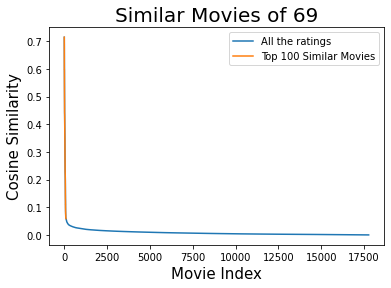

In [40]:
plt.plot(similarities[similarIndices], label='All the ratings')
plt.plot(similarities[similarIndices[:100]], label='Top 100 Similar Movies')
plt.title(f"Similar Movies of {movieId}", fontsize=20)
plt.xlabel("Movie Index", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

In [41]:
#Displaying the 10 most similar movies for the given movieId
movieTitles.loc[similarIndices[:10]]

,year_of_release,title
movie_id,,
11008,2003.0,WWE: Judgment Day 2003
8959,2003.0,WWE: Bad Blood 2003
13661,2002.0,WWE: No Mercy 2002
10376,2002.0,WWE: King of the Ring 2002
16904,2003.0,WWE: Unforgiven 2003
5834,2003.0,WWE: Royal Rumble 2003
7862,2002.0,WWE: Survivor Series 2002
8876,2002.0,WWE: Rebellion 2002
4142,2003.0,WWE: Summerslam 2003
